# Exploratory Data Analysis
Telling the future is the exciting part of data mining.  Everyone wants to build the best model that can be the most accurate prediction of future results or have the best explanation for why the past occurred the way it has.  But in order to have a valuable model, it is important to understand the data, determine the shape, understand the predictors and the target variables (if any).  Understanding the scale of these values and their relationship to each other can save hours of testing different modelling techniques and parameter tuning.

The next cell is one that will appear in some configuration as the first in nearly every notebook.  It imports the key libraries we are going to use in our analysis and model building.  In the first case, we will depend on pandas and numpy for our data manipulation and we'll leverage matplotlib as our graphical library.  We'll also use the seaborn library to show off a few plots and visuals that are not quite as readily accessible with the matplotlib library.

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
#import dmba

DATA_DIR = Path('../data')


## Boston Housing Dataset
Let's take a look at some basic data manipulation with pandas and understand how to get some data to work with.  In all of our examples, we'll use a pretty standard text format called (CSV) or comma-separated-values files.  This format is readable by nearly every statistical software package and by humans.  The first row is typically the name of the columns and each line of the file is a row of data with the values separated by commas.  The pandas library supports many different ways to load up a dataframe, which we will use as the primary mechanism for manipulating data in these notebooks.

### Business Context
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):

- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to ﬁve Boston employment centers
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per 10,000
- **PTRATIO**: pupil-teacher ratio by town
- **B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in 1000s
- **CAT.MEDV**: Is median value of owner-occupied home in tract above $30k (CAT.MEDV = 1) or not (CAT.MEDV = 0)

We can see that the input attributes have a mixture of units.

In [ ]:
# Load up the housing dataset
housing_df = pd.read_csv(DATA_DIR/'BostonHousing.csv')
housing_df

In [ ]:
# Change the column to be more convenient
housing_df= housing_df.rename(columns={'CAT.MEDV':'CAT_MEDV'})
# Take a look at the first few rows of data
housing_df.head()

In [ ]:
# check the rows and columns
housing_df.shape

We see from the ouput about that we have 506 rows and 14 columns, but we can't see all the columns - let's check out the column names and get an idea of the some descriptive statistics for each numerical column)

In [ ]:
housing_df.describe()

In [ ]:
housing_df.dtypes

Now that we have an idea of the numerical fields.  We should check out the distribution of the CAT_MEDV field to see how these are laid out.

In [ ]:
housing_df.value_counts(['CAT_MEDV'])

We can now take a look at a couple of values as they relate to our target variable (CAT_MEDV).

In [ ]:
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

In [ ]:
ax=housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('Avg. MEDV')

In [ ]:
dataForPlot= housing_df.groupby('CHAS').mean()['CAT_MEDV']*100
ax=dataForPlot.plot(kind='bar', figsize=[5,3])
ax.set_ylabel('% of CAT.MEDV')

We may also be interested in the relationship between a set of the variables so that we can identify which ones may prove to be over-influencing a regression model.

In [ ]:
print(housing_df.corr())
sns.heatmap(housing_df.corr(), cmap='YlGnBu')

In [1]:
correlationMatrix = housing_df.corr()
# Convert our correlationMatrix to a one-dimensional array
correlationMatrix = correlationMatrix.unstack()
correlationMatrix[abs(correlationMatrix) > 0.7]

NameError: name 'housing_df' is not defined

## Data Preparation Tasks

* [ ] Dealing with missing data 
  - [ ] Replacing with userdefined value
  - [ ] Mean/median/mode
  - [ ] Random value

* [ ] Filtering inappropriate values
* [ ] Standardizing values (z-score standardization)
* [ ] Normalizing values (min/max normalization)
* [ ] Converting numerical values to categorical
* [ ] Discretizing (binning)
* [ ] Feature selection (removing unary features/columns)



### Dealing with missing data

Missing data can be fields that are represented as NULL, Na, NaN (not a number), blanks or it could even just plain wrong (like a number where you expect a string or a string where you expect a number).  All of these situations can be handled similarly.  Fortunately, the `pandas` library gives us some tools to deal with them.

In [2]:
# Load the dirty_cereal dataset

dirty_cereal_df = pd.read_csv(DATA_DIR/'cereals_dirty.csv')
dirty_cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,NaN,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [7]:
# Let's try to find empty columns
dirty_cereal_df.isna().sum()

name        0
mfr         0
type        1
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       5
sugars      1
potass      2
vitamins    0
shelf       0
weight      3
cups        0
rating      0
dtype: int64

In [12]:
# So it seems we have some null or NaN fields, how should we proceed
# We could replace the values
new_cereal_df = dirty_cereal_df.copy(deep=True)
# Find all the fields with an na or null and replace with 0
new_cereal_df.loc[new_cereal_df.carbo.isna()] = 0

# TODO: repeat for sugars, potass


Your turn
---------
There are several other issues in this dataset like 
- there is a calorie number < 0
- the manufacturer codes include K, G, P etc, but also Post and Kellogg how to deal?
- some rows have weight = 0 or na, should we drop them? or replace them with mean values?

In [20]:
dirty_cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,72.000000,76.000000,75.000000,77.000000,77.000000,74.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.875000,7.026316,98.666667,28.246753,2.207792,1.026351,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.944822,4.378656,70.410636,22.342523,0.832524,0.149342,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,15.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


#### Discretizing / Binning
Sometimes, it might be helpful to have categories for the ranges of values rather than just the value themselves.  For instance, if we are looking at the cereal example, it might be helpful to determine that cereal with a low calorie count vs a high calorie count

<AxesSubplot:>

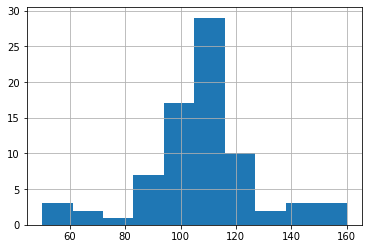

In [28]:
cereal_df = pd.read_csv(DATA_DIR/'cereals.csv')
cereal_df.calories.hist()


In [33]:
# How about we create a category for these fields instead
cereal_df['calorie_groups'] = pd.qcut(cereal_df.calories,q=4,duplicates='drop')
cereal_df.calorie_groups.value_counts()

(49.999, 100.0]    30
(100.0, 110.0]     29
(110.0, 160.0]     18
Name: calorie_groups, dtype: int64